In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'size'   : 22}
mpl.rc('font', **font)

In [18]:
dfc = pd.read_csv("./bases/suicide/master.csv")
filtro = dfc.year > 1999
filtro2 = dfc.year < 2016
dfc = dfc[filtro & filtro2]
year = pd.period_range('2000', '2015', freq='Y')
dfc
dfc = dfc.groupby(['country','year'], as_index=False)['suicides_no','population'].sum()
dfc = dfc.set_index(['country','year'])
dfc = dfc.reindex( pd.MultiIndex.from_product([dfc.index.levels[0],dfc.index.levels[1]], names=['country', 'year']),fill_value=np.nan).reset_index()
dfc

,country,year,suicides_no,population
0,Albania,2000,54.0,2796300.0
1,Albania,2001,119.0,2799349.0
2,Albania,2002,133.0,2818839.0
3,Albania,2003,124.0,2843929.0
4,Albania,2004,146.0,2874991.0
5,Albania,2005,0.0,2783320.0
6,Albania,2006,0.0,2780176.0
7,Albania,2007,124.0,2770344.0
8,Albania,2008,160.0,2757059.0
9,Albania,2009,0.0,2745735.0


In [22]:
df = pd.read_csv("./bases/suicide/master.csv") 
filtro = df.year > 1999
filtro2 = df.year < 2016
df = df[filtro & filtro2]
year = pd.period_range('2000', '2015', freq='Y')
df = df.groupby(['country','year','sex'], as_index=False)['suicides_no','population'].sum()
df = df.set_index(['country','year','sex'])
df = df.reindex( pd.MultiIndex.from_product([df.index.levels[0],df.index.levels[1],df.index.levels[2]], names=['country', 'year','sex']),fill_value=np.nan).reset_index()
func = lambda x:x.suicides_no.isna()
series = df[func].reset_index().groupby(['country'])['year'].count()
lista = list(series[series > 10].index)
lista
#filtro3 = df.country.isin(lista)
#df = df[~filtro3]
#df

['Azerbaijan',
 'Bosnia and Herzegovina',
 'Cabo Verde',
 'Jamaica',
 'Kiribati',
 'Maldives',
 'Montenegro',
 'Nicaragua',
 'Oman',
 'Philippines',
 'San Marino',
 'Sri Lanka',
 'Turkey',
 'United Arab Emirates']

In [3]:
filtrom = df.sex == 'male'
dfm = df[filtrom]
dfmales = dfm.pivot_table('suicides_no', ['country'], 'year')
dfmales = dfmales.interpolate(method='linear',limit_direction='both', axis=1)
dfmales = pd.melt(dfmales.reset_index(), id_vars=["country"], 
                  var_name="year", value_name="suicides")
dfmalep = dfm.pivot_table('population', ['country'], 'year')
dfmalep = dfmalep.interpolate(method='linear',limit_direction='both', axis=1)
dfmalep = pd.melt(dfmalep.reset_index(), id_vars=["country"], 
                  var_name="year", value_name="population")
dfmale = dfmalep.merge(dfmales).sort_values(['country','year']).reset_index(drop=True)
dfmale['suicide100'] = (dfmale['suicides'] * 100000 ) / dfmale['population']

In [4]:
dfmalew = dfmale.groupby('year').agg(np.sum).reset_index()
dfmalew['suicide100'] = (dfmalew['suicides'] * 100000 ) / dfmalew['population']

In [5]:
filtrom = df.sex == 'female'
dff = df[filtrom]
dffemales = dff.pivot_table('suicides_no', ['country'], 'year')
dffemales = dffemales.interpolate(method='linear',limit_direction='both', axis=1)
dffemales = pd.melt(dffemales.reset_index(), id_vars=["country"], 
                  var_name="year", value_name="suicides")
dffemalep = dff.pivot_table('population', ['country'], 'year')
dffemalep = dffemalep.interpolate(method='linear',limit_direction='both', axis=1)
dffemalep = pd.melt(dffemalep.reset_index(), id_vars=["country"], 
                  var_name="year", value_name="population")
dffemale = dffemalep.merge(dffemales).sort_values(['country','year']).reset_index(drop=True)
dffemale['suicide100'] = (dffemale['suicides'] * 100000 ) / dfmale['population']

In [6]:
dffemalew = dffemale.groupby('year').agg(np.sum).reset_index()
dffemalew['suicide100'] = (dffemalew['suicides'] * 100000 ) / dffemalew['population']

Text(0, 0.5, 'suicidio por 100.000')

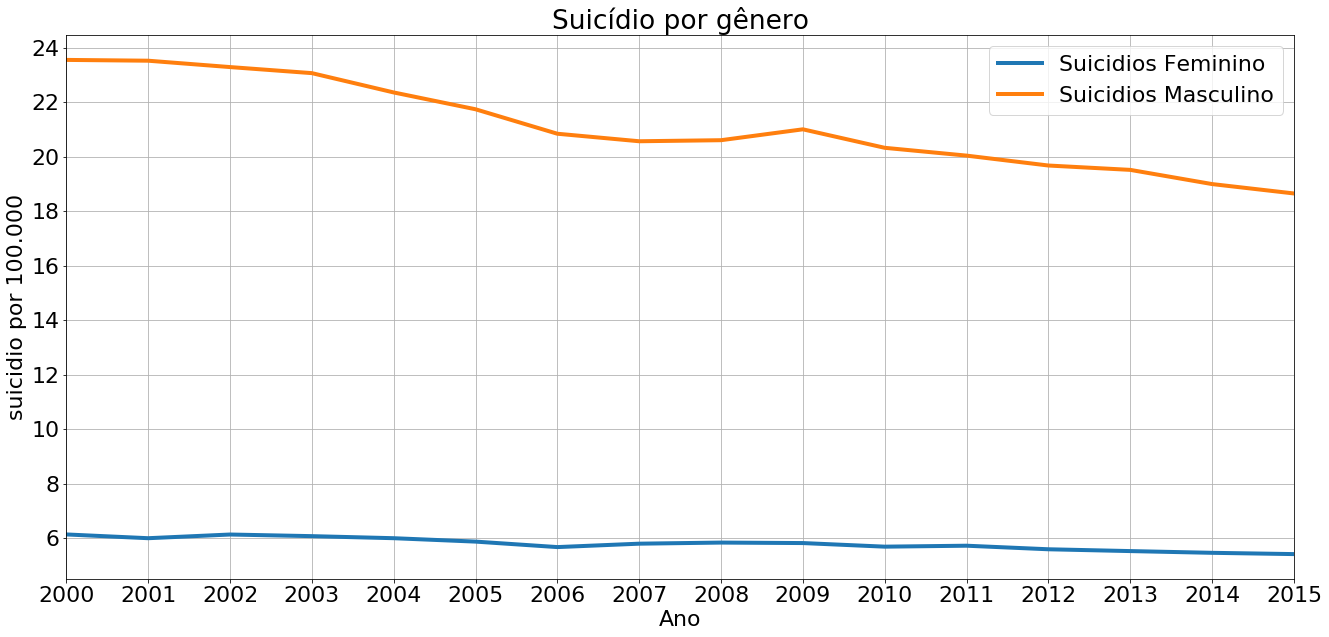

In [10]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title("Suicídio por gênero")
dffemalew.plot(x='year', y='suicide100', ax=ax,linewidth=4, grid=True,yticks=range(24,5,-2),label='Suicidios Feminino')
dfmalew.plot(x='year', y='suicide100', ax=ax,linewidth=4, grid=True,xticks=range(2000,2016), label='Suicidios Masculino')
ax.set_xlabel("Ano")
ax.set_ylabel("suicidio por 100.000")